In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
df.duplicated().sum()

1889

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.groupby("Education")["Age"].mean()

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

In [10]:
df.sort_values(by="JoiningYear", ascending = True, inplace = True)

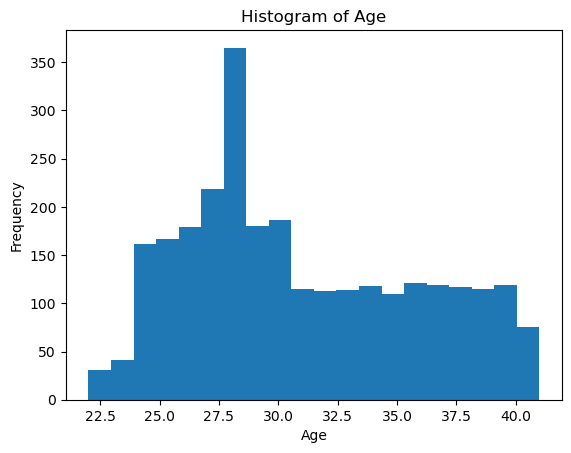

In [11]:
plt.hist(df["Age"], bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

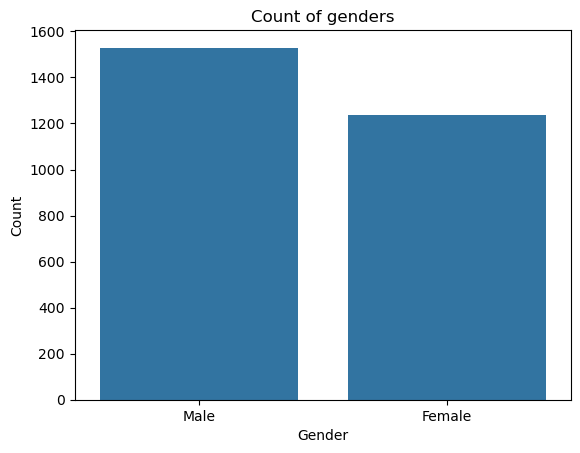

In [12]:
sns.countplot(data = df, x="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of genders")
plt.show()

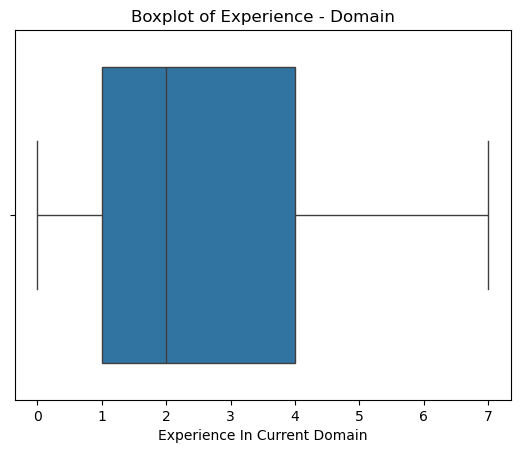

In [13]:
sns.boxplot(data = df, x = "ExperienceInCurrentDomain")
plt.xlabel("Experience In Current Domain")
plt.title("Boxplot of Experience - Domain")
plt.show()

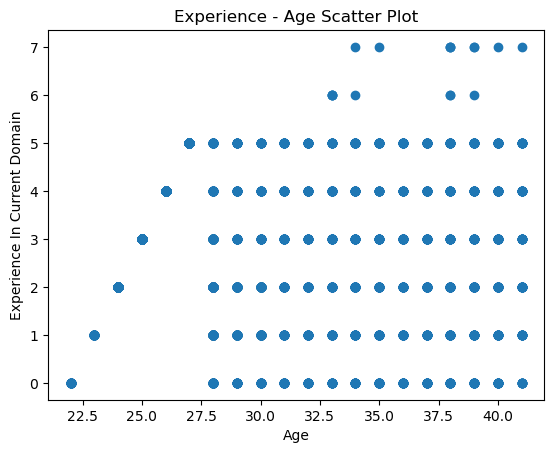

In [14]:
plt.scatter(df["Age"], df["ExperienceInCurrentDomain"])
plt.xlabel("Age")
plt.ylabel("Experience In Current Domain")
plt.title("Experience - Age Scatter Plot")
plt.show()

In [15]:
df.groupby("PaymentTier")["LeaveOrNot"].value_counts()

PaymentTier  LeaveOrNot
1            0              141
             1               77
2            1              343
             0              227
3            0             1308
             1              668
Name: count, dtype: int64

In [16]:
df.groupby("City")["City"].count()

City
Bangalore    1171
New Delhi     792
Pune          801
Name: City, dtype: int64

In [17]:
benched_percentage = df.groupby("EverBenched")["EverBenched"].count() / len(df) *100

benched_percentage

EverBenched
No     86.939219
Yes    13.060781
Name: EverBenched, dtype: float64

In [18]:
df.groupby(["Education", "Gender"])["Age"].mean()

Education  Gender
Bachelors  Female    30.929530
           Male      31.619313
Masters    Female    30.348921
           Male      29.994429
PHD        Female    29.730159
           Male      29.795699
Name: Age, dtype: float64

In [19]:
df.groupby(["JoiningYear", "Gender"])["Gender"].count()

JoiningYear  Gender
2012         Female    127
             Male      181
2013         Female    175
             Male      221
2014         Female    163
             Male      222
2015         Female    265
             Male      199
2016         Female    123
             Male      187
2017         Female    284
             Male      378
2018         Female     98
             Male      141
Name: Gender, dtype: int64

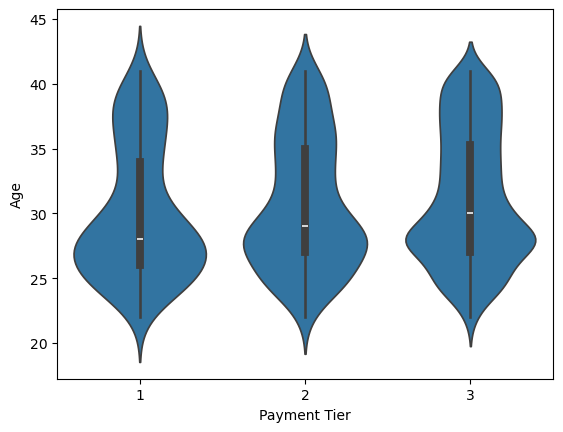

In [20]:
sns.violinplot(data = df, x = "PaymentTier", y = "Age")
plt.xlabel("Payment Tier")
plt.ylabel("Age")
plt.show()

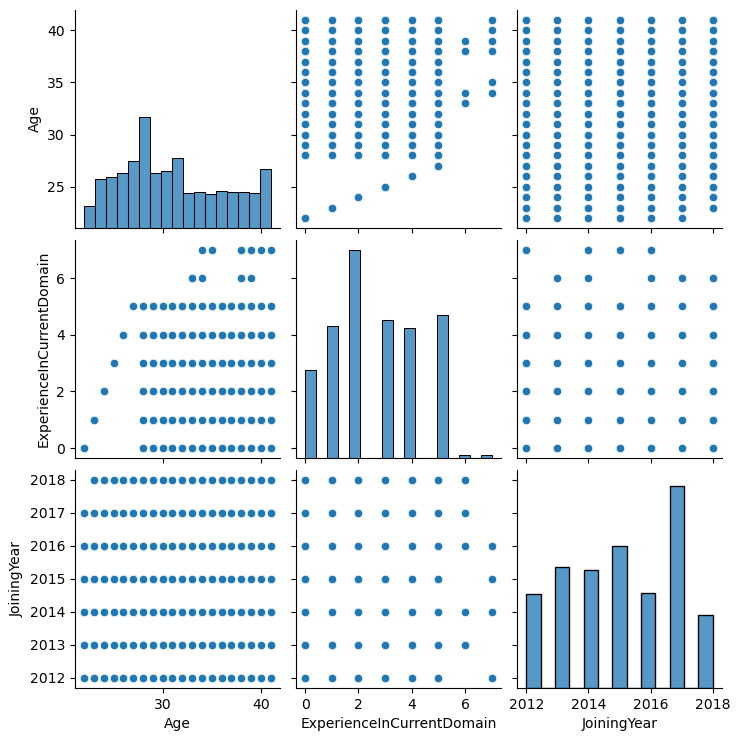

In [21]:
sns.pairplot(df[["Age", "ExperienceInCurrentDomain", "JoiningYear"]])
plt.show()

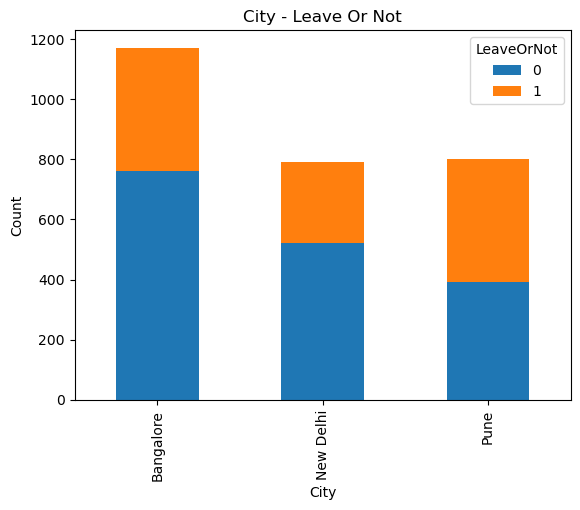

In [22]:
city_leave_counts = df.groupby("City")["LeaveOrNot"].value_counts().unstack()
city_leave_counts.plot(kind = "bar", stacked = True)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("City - Leave Or Not")
plt.legend(title = "LeaveOrNot")
plt.show()

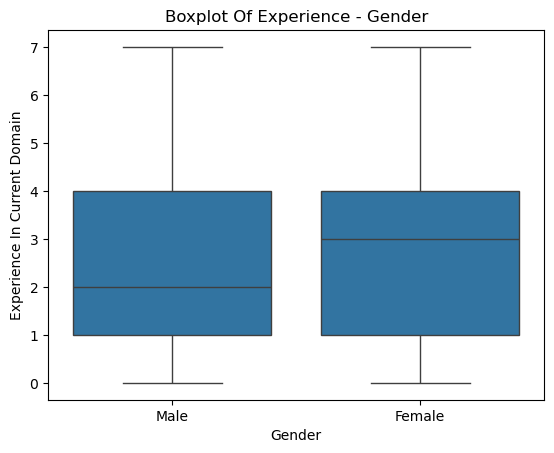

In [23]:
sns.boxplot(data = df, x="Gender", y="ExperienceInCurrentDomain")
plt.xlabel("Gender")
plt.ylabel("Experience In Current Domain")
plt.title("Boxplot Of Experience - Gender")
plt.show()

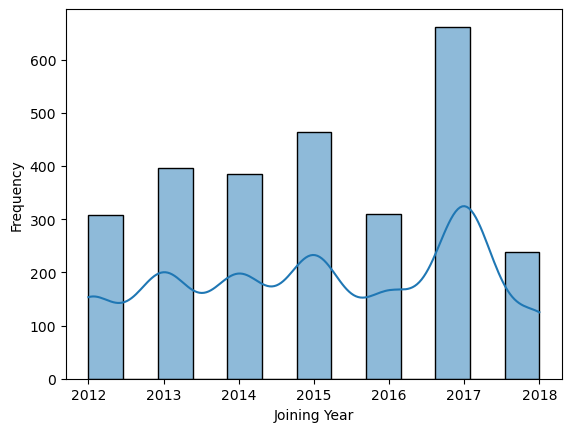

In [24]:
sns.histplot(df["JoiningYear"], kde = True)
plt.xlabel("Joining Year")
plt.ylabel("Frequency")
plt.show()

In [25]:
grouped = df.groupby(["Education", "Gender"])["ExperienceInCurrentDomain"].mean().unstack()

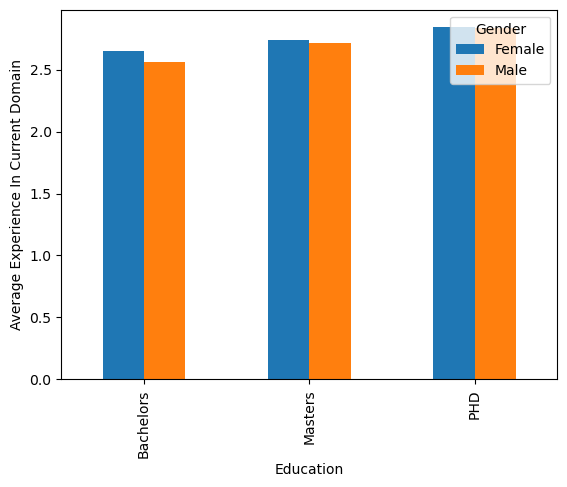

In [26]:
grouped.plot(kind = "bar")
plt.xlabel("Education")
plt.ylabel("Average Experience In Current Domain")
plt.show()

In [27]:
grouped = df.groupby(["JoiningYear", "EverBenched"])["EverBenched"].count().unstack()

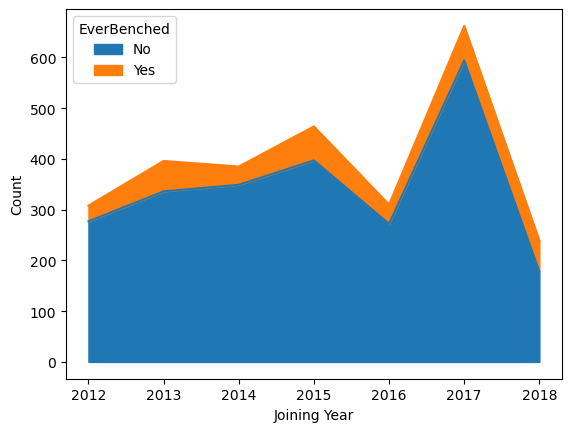

In [28]:
grouped.plot(kind = "area", stacked = True)
plt.xlabel("Joining Year")
plt.ylabel("Count")
plt.legend(title = "EverBenched")
plt.show()

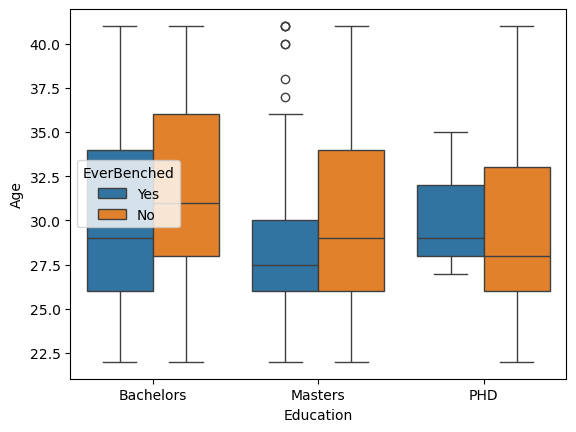

In [29]:
sns.boxplot(data = df, x = "Education", y = "Age", hue = "EverBenched")
plt.xlabel("Education")
plt.ylabel("Age")
plt.legend(title = "EverBenched")
plt.show()

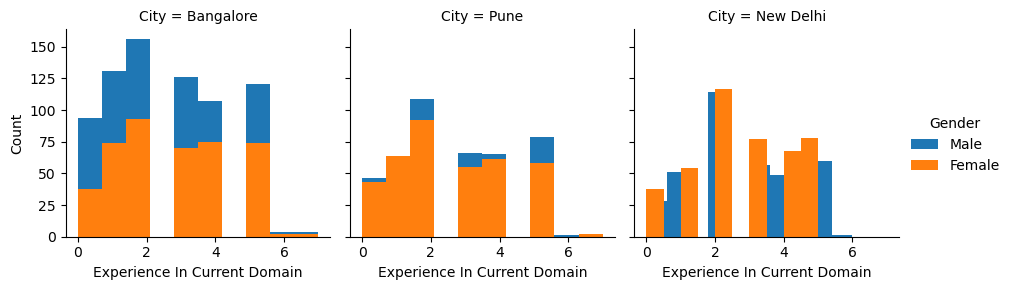

In [30]:
g = sns.FacetGrid(df, col = "City", hue = "Gender")
g.map(plt.hist, "ExperienceInCurrentDomain")
g.set_axis_labels("Experience In Current Domain", "Count")
g.add_legend(title = "Gender")
plt.show()

In [31]:
grouped = df.groupby(["JoiningYear", "City"])["Age"].mean().unstack()

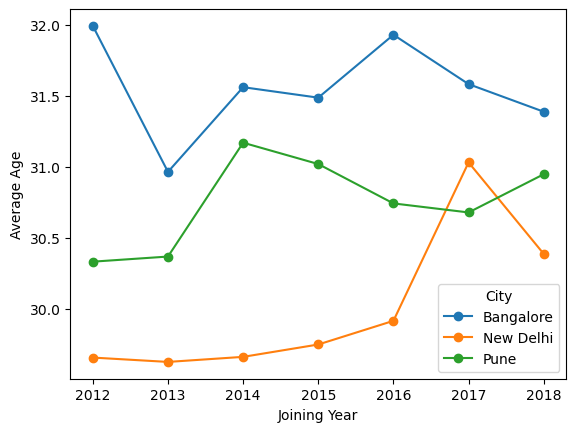

In [32]:
grouped.plot(kind = "line", marker = "o")
plt.xlabel("Joining Year")
plt.ylabel("Average Age")
plt.show()

In [33]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [34]:
X = df.iloc[:, :-1]
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2
3052,Bachelors,2012,Bangalore,3,34,Male,No,1
3054,Bachelors,2012,Bangalore,3,39,Female,No,2
3055,Bachelors,2012,Bangalore,3,41,Male,No,3
3058,Bachelors,2012,Bangalore,3,33,Male,No,2
...,...,...,...,...,...,...,...,...
2221,Bachelors,2018,Pune,3,29,Male,Yes,1
2529,Masters,2018,New Delhi,3,30,Female,No,4
70,Bachelors,2018,Bangalore,3,23,Female,No,1
3267,Bachelors,2018,New Delhi,3,35,Female,No,2


In [35]:
Y = df.iloc[:, -1]
Y

4651    0
3052    0
3054    0
3055    0
3058    0
       ..
2221    1
2529    1
70      1
3267    1
3293    1
Name: LeaveOrNot, Length: 2764, dtype: int64

In [36]:
X.drop(columns = ["JoiningYear", "City", "Age"], inplace = True)

In [37]:
X

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,3,Male,Yes,2
3052,Bachelors,3,Male,No,1
3054,Bachelors,3,Female,No,2
3055,Bachelors,3,Male,No,3
3058,Bachelors,3,Male,No,2
...,...,...,...,...,...
2221,Bachelors,3,Male,Yes,1
2529,Masters,3,Female,No,4
70,Bachelors,3,Female,No,1
3267,Bachelors,3,Female,No,2


In [38]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [39]:
X["Education"] = labelencoder.fit_transform(X["Education"])
X["Gender"] = labelencoder.fit_transform(X["Gender"])
X["EverBenched"] = labelencoder.fit_transform(X["EverBenched"])

In [40]:
X

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,0,3,1,1,2
3052,0,3,1,0,1
3054,0,3,0,0,2
3055,0,3,1,0,3
3058,0,3,1,0,2
...,...,...,...,...,...
2221,0,3,1,1,1
2529,1,3,0,0,4
70,0,3,0,0,1
3267,0,3,0,0,2


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [43]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(Y_test, predictions)))

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, Y_train)

LogisticRegression()

In [45]:
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)

Accuracy score in model is 0.6835443037974683


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [47]:
param_grid = {"n_neighbors" : [3, 5, 7, 9, 11],
              "weights" : ["uniform", "distance"],
              "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3)
gridkn.fit(scaled_X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [48]:
print("Best parameters", gridkn.best_params_)

Best parameters {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


In [49]:
knpreds = gridkn.predict(scaled_X_test)
modelperformance(knpreds)

Accuracy score in model is 0.6781193490054249


In [50]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {"C" : [0.01, 0.1, 0.5, 1], "kernel" : ["linear", "rbf", "poly"]}

In [51]:
gridsvc = GridSearchCV(svm, param_grid, cv = 3)
gridsvc.fit(scaled_X_train, Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
gridsvc.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [53]:
pred_svc = gridsvc.predict(scaled_X_test)
modelperformance(pred_svc)

Accuracy score in model is 0.6980108499095841


In [54]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
      "criterion" : ["gini", "entropy"],
      "splitter": ["best", "random"],
      "max_depth" : [None, 10, 20, 30, 40, 50],
      "min_samples_split" : [2, 5, 10],
      "min_samples_leaf" : [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3)
grid_search_tree.fit(scaled_X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [55]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [56]:
preds = grid_search_tree.predict(scaled_X_test)
modelperformance(preds)

Accuracy score in model is 0.6907775768535263


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid = {
    "n_estimators" : n_estimators,
    "max_features" : max_features,
    "bootstrap" : bootstrap,
    "oob_score" : oob_score
}
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=3)
grid_rfc.fit(scaled_X_train, Y_train)

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueError("Ou

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [58]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 32, 'oob_score': False}

In [59]:
preds = grid_rfc.predict(scaled_X_test)
modelperformance(preds)

Accuracy score in model is 0.6835443037974683
